In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

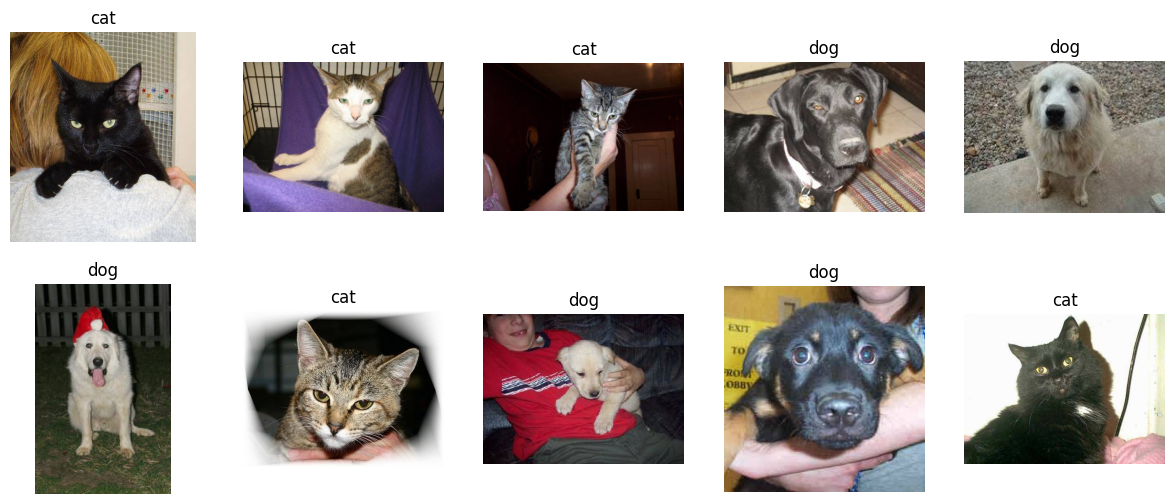

In [3]:
import os
import random
import matplotlib.image as mpimg



folder_path = "../Labb2/original_data/train/train"
image_files = [file for file in os.listdir(folder_path) if file.endswith('.jpg') or file.endswith('.png')]


random_image_files = random.sample(image_files, 10)


fig, axes = plt.subplots(2, 5, figsize=(15, 6))
# goes through and randoms the pictures
for i, ax in enumerate(axes.flat):
   
    random_image_file = random_image_files[i]
    random_image_path = os.path.join(folder_path, random_image_file)
    random_image = mpimg.imread(random_image_path)
    
    label = random_image_file.split('.')[0]
    
    ax.imshow(random_image)
    ax.axis('off')
    ax.set_title(label)  

plt.show()

In [4]:
small_folder = "expriment_small_data"
tiny_folder = "expriment_tiny_data"
sub_files = ["train", "test", "val"]
# creates train, test and val folders
if not os.path.exists(small_folder):
    os.mkdir(small_folder)
if not os.path.exists(tiny_folder):
    os.mkdir(tiny_folder)
    
for folder in sub_files:
    folder_small = os.path.join(small_folder, folder)
    if not os.path.exists(folder_small):
        os.mkdir(folder_small)    
for folder in sub_files:
    folder_tiny = os.path.join(tiny_folder, folder)
    if not os.path.exists(folder_tiny):
        os.mkdir(folder_tiny)    

In [18]:
import shutil
from sklearn.model_selection import train_test_split

folder_path


'../Labb2/original_data/train/train'

In [5]:
import os
import random
import shutil


train_folder = "../Labb2/original_data/train/train"
experiment_small_train = "../Labb2/expriment_small_data/train"
experiment_small_validation = "../Labb2/expriment_small_data/val"



train_files = [file for file in os.listdir(train_folder) if file.endswith('.jpg') or file.endswith('.png')]



    
selected_files = random.sample(train_files, min(2000, len(train_files)))

    
train_files = selected_files[:1600]
val_files = selected_files[1600:]

# put random pictures to the folders
for file in train_files:
    source_path = os.path.join(train_folder, file)
    destination_path = os.path.join(experiment_small_train, file)
    shutil.copyfile(source_path, destination_path)

    
for file in val_files:
    source_path = os.path.join(train_folder, file)
    destination_path = os.path.join(experiment_small_validation, file)
    shutil.copyfile(source_path, destination_path)

In [6]:
test_folder = "../Labb2/original_data/test/test"
experiment_small_test = "../Labb2/expriment_small_data/test"

test_files = [file for file in os.listdir(test_folder) if file.endswith('.jpg') or file.endswith('.png')]

selected_files = random.sample(test_files, min(500, len(test_files)))

for file in selected_files:
    source_path = os.path.join(test_folder, file)
    destination_path = os.path.join(experiment_small_test, file)
    shutil.copyfile(source_path, destination_path)

In [7]:
import pandas as pd

images_train = "../Labb2/expriment_small_data/train"
images_val = "../Labb2/expriment_small_data/val"



file_labels = []


def create_dataframe(folder_path):
    file_labels = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            label = file_name.split('.')[0]  
            file_labels.append({'file_name': file_name, 'label': label})
    df = pd.DataFrame(file_labels)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    return df

train_df = create_dataframe(images_train)
val_df = create_dataframe(images_val)



print(val_df)


         file_name label
0     cat.9656.jpg   cat
1     dog.2928.jpg   dog
2    cat.11980.jpg   cat
3     cat.9772.jpg   cat
4     cat.3490.jpg   cat
..             ...   ...
395   cat.2614.jpg   cat
396   cat.4162.jpg   cat
397   dog.2561.jpg   dog
398   dog.6880.jpg   dog
399   cat.4041.jpg   cat

[400 rows x 2 columns]


In [8]:
train_df["label"].unique()

array(['cat', 'dog'], dtype=object)

In [3]:
# ohe that I didn`t get to work in the end 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse_output = False).set_output(transform="pandas")

ohe_train = ohe.fit_transform(train_df[["label"]])

NameError: name 'train_df' is not defined

In [24]:
ohe_train

,label_cat,label_dog
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1595,0.0,1.0
1596,0.0,1.0
1597,0.0,1.0
1598,0.0,1.0


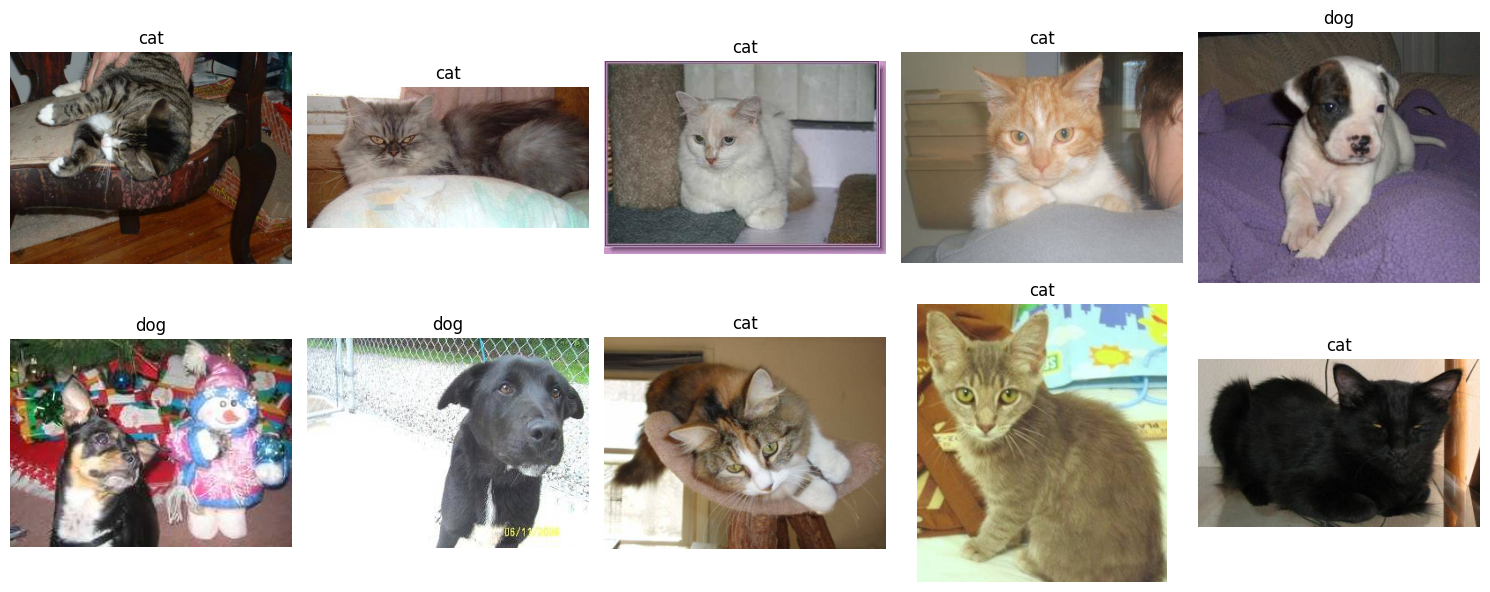

In [9]:
sample_df = train_df.head(10)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    if i < len(sample_df):  
        row = sample_df.iloc[i]
        image_path = os.path.join(folder_path, row["file_name"])
        image = mpimg.imread(image_path)
        
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(row["label"])
    else:  
        ax.axis("off")

plt.tight_layout()  
plt.show()

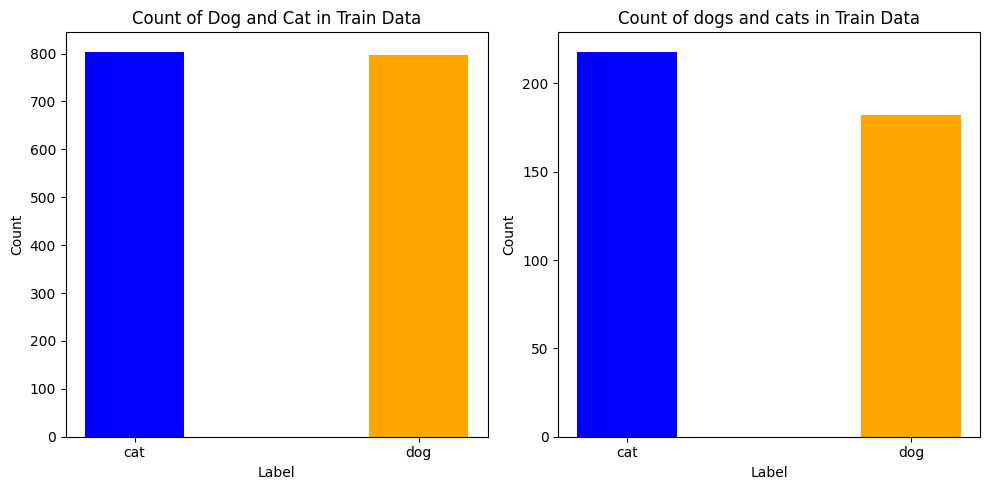

In [10]:
# plots of how many cats and dogs in the datasets to see if it have been randomized
train_counts = train_df["label"].value_counts()
val_counts = val_df["label"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
width = 0.35
labels = train_counts.index.tolist()

train_bars = ax[0].bar(labels, train_counts, width, color=["blue", "orange"])
ax[0].set_xlabel("Label")
ax[0].set_ylabel("Count")
ax[0].set_title("Count of Dog and Cat in Train Data")

val_bars = ax[1].bar(labels, val_counts, width, color=["blue", "orange"])
ax[1].set_xlabel("Label")
ax[1].set_ylabel("Count")
ax[1].set_title("Count of dogs and cats in Train Data")

plt.tight_layout()
plt.show()

### Count of animals within their indexspan so we can see that the dataframe have been randomed


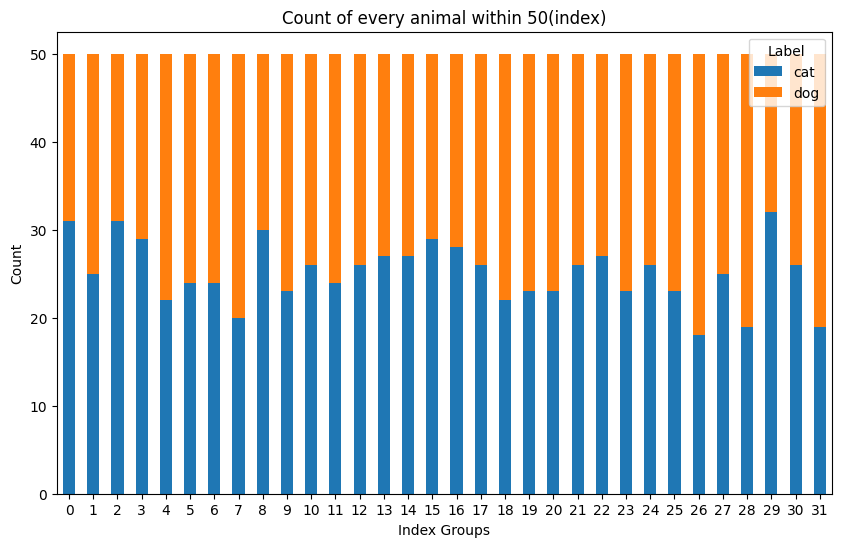

In [11]:
train_df["group"] = train_df.index // 50

# Count of animals so we can see that it`s spread out good
grouped_counts = train_df.groupby("group")["label"].value_counts().unstack(fill_value=0)

grouped_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Index Groups")
plt.ylabel("Count")
plt.title("Count of every animal within 50(index)")
plt.legend(title="Label")
plt.xticks(rotation=0)
plt.show()


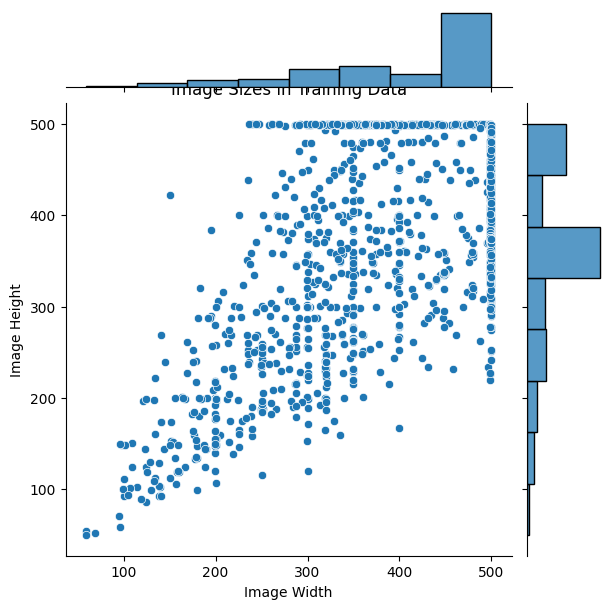

In [12]:
import os
data_path = "../Labb2/expriment_small_data/train"

image_size = []

for file_name in os.listdir(data_path):
    if file_name.endswith(".jpg"):
        file_path = os.path.join(data_path , file_name)
        image = plt.imread(file_path)
        height , width , _ = image.shape
        image_size.append((width , height))

widths , heights = zip(*image_size)

sns.jointplot( x= widths , y= heights , kind="scatter", marginal_kws=dict(bins=8, fill=True))


plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Sizes in Training Data")


plt.show()


##### Here is almost hte same plot but we toke away pictures that are too big and pictures that have too high diffrence in the axes

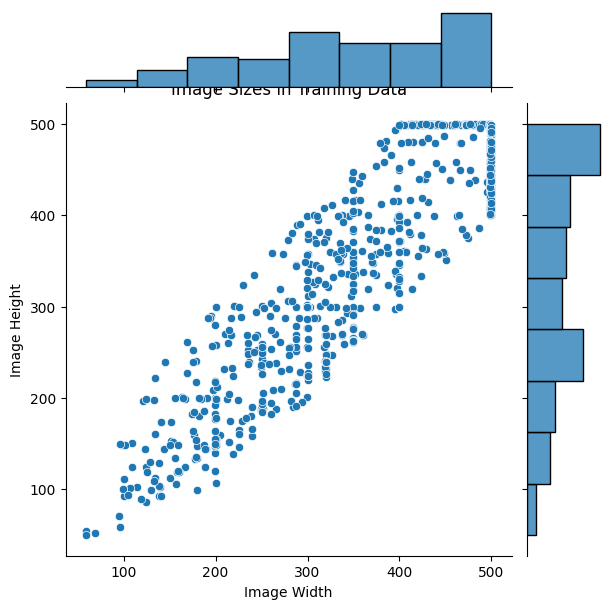

In [13]:
data_path = "../Labb2/expriment_small_data/train"

image_size = []

for file_name in os.listdir(data_path):
    if file_name.endswith(".jpg"):
        file_path = os.path.join(data_path, file_name)
        image = plt.imread(file_path)
        height, width, _ = image.shape
        
        if width <= 500 and height <= 500 and abs(width - height) <= 100 and abs(height - width) <= 100:
            image_size.append((width, height))


widths, heights = zip(*image_size) if image_size else ([], [])

sns.jointplot(x=widths, y=heights, kind="scatter", marginal_kws=dict(bins=8, fill=True))

plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Sizes in Training Data")
plt.show()

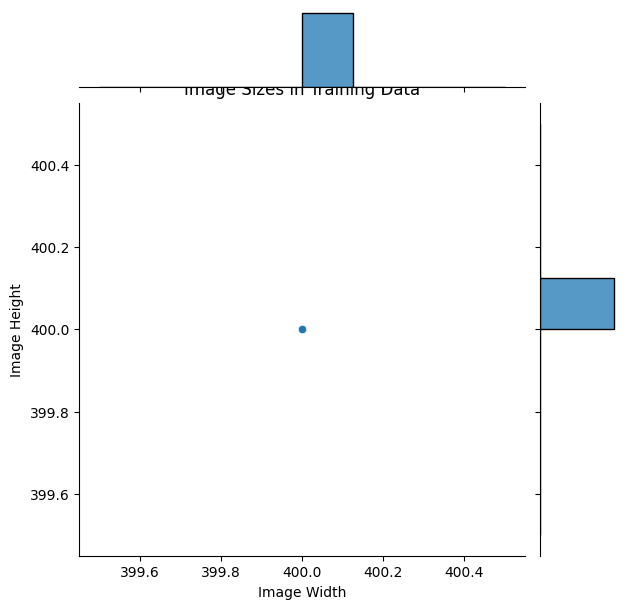

In [36]:
from PIL import Image

data_path = "../Labb2/expriment_small_data/train"
target_size = (400, 400)

image_size = []
resized_images = []
labels = []

for file_name in os.listdir(data_path):
    if file_name.endswith(".jpg"):
        file_path = os.path.join(data_path, file_name)
        
        
        with Image.open(file_path) as img:
            resized_img = img.resize(target_size)
            width, height = resized_img.size
            
            
            if abs(width - height) <= 100 and abs(height - width) <= 100:
                image_size.append((width, height))
                
                
                img_array = np.array(resized_img)
                resized_images.append(img_array)
                
                


resized_images_array = np.array(resized_images)


widths, heights = zip(*image_size) if image_size else ([], [])


sns.jointplot(x=widths, y=heights, kind="scatter", marginal_kws=dict(bins=8, fill=True))


plt.xlabel("Image Width")
plt.ylabel("Image Height")
plt.title("Image Sizes in Training Data")
plt.show()

In [3]:
train_data_path = "./Labb2/experiment_small_data/train"

## 3.0


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
# Help from chatgpt
# function that create labels to the pictures and changes the sizes 
def load_prepare_images(data_path, target_size=(300, 300)):
    images = []
    labels = []
    
    for file_name in os.listdir(data_path):
        if file_name.endswith(".jpg"):
            file_path = os.path.join(data_path, file_name)
            with Image.open(file_path) as img:
                # to have pictures that fit more 
                original_width, original_height = img.size
                if abs(original_width - original_height) <= 100:
                    img = img.resize(target_size)
                    img_array = np.array(img)
                    images.append(img_array)
                    
                    
                    label = 1 if 'dog' in file_name else 0
                    labels.append(label)
                
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


train_data_path = "../Labb2/expriment_small_data/train"
val_data_path = "../Labb2/expriment_small_data/val"
test_data_path = "../Labb2/expriment_small_data/test"

train_images, train_labels = load_prepare_images(train_data_path)
val_images, val_labels = load_prepare_images(val_data_path)
test_images, test_labels = load_prepare_images(test_data_path)


train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0


train_labels = to_categorical(train_labels, num_classes=2)
val_labels = to_categorical(val_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)



In [3]:
# shapes of images
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (711, 300, 300, 3)
Train labels shape: (711, 2)
Validation images shape: (170, 300, 300, 3)
Validation labels shape: (170, 2)
Test images shape: (239, 300, 300, 3)
Test labels shape: (239, 2)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# model from 3 a
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(512, activation="relu"),
    Dense(2, activation="softmax")  
])


model.compile(optimizer=Adam(),
              loss="binary_crossentropy",  
              metrics=["accuracy"])


history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(val_images, val_labels)
    )


test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 0.4749 - loss: 0.8677 - val_accuracy: 0.5118 - val_loss: 0.6931
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5124 - loss: 0.6934 - val_accuracy: 0.4941 - val_loss: 0.6931
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4896 - loss: 0.6930 - val_accuracy: 0.5059 - val_loss: 0.6900
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5730 - loss: 0.6895 - val_accuracy: 0.4882 - val_loss: 0.6913
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5875 - loss: 0.6879 - val_accuracy: 0.6294 - val_loss: 0.6862
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6438 - loss: 0.6682 - val_accuracy: 0.5647 - val_loss: 0.6840
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.6285 - loss: 0.6342 - val_accuracy: 0.6824 - val_loss: 0.6379
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7232 - loss: 0.5644 - val_accuracy: 0.6706 - val_loss:

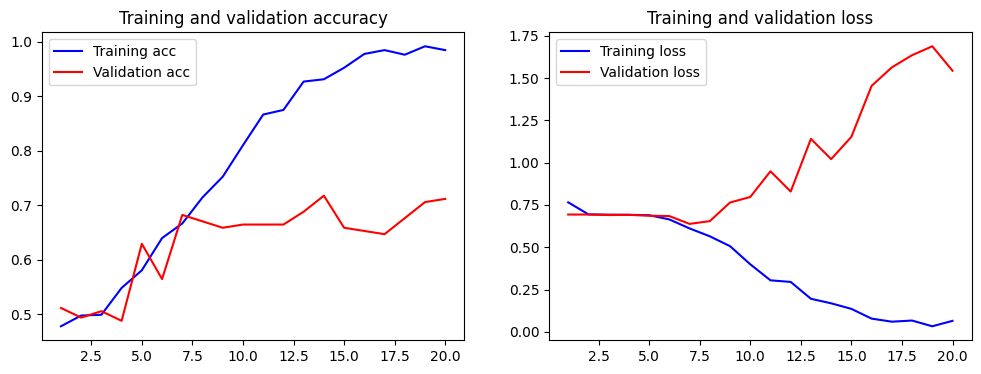

In [11]:
# plot of the curve how accuracy it is and the losses
def plot_training_history(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, "b", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()

    plt.show()

plot_training_history(history)